<a href="https://colab.research.google.com/github/horribillis/MADMO/blob/main/%5B%D0%9C%D0%90%D0%94%D0%9C%D0%9E%5D_%D0%92%D0%B0%D1%81%D1%8E%D0%BA%D0%BE%D0%B2_%D0%9A_%D0%90__%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%84%961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание 1
### Основы Python и пакет NumPy
---


In [1]:
import numpy as np
import random
import scipy.stats as sps

### Задача 1
В первой задаче вам предлагается перемножить две матрицы двумя способами -- без использования пакета ***numpy*** и с ним. Использовать матричное произведение.

In [2]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((100,1000))
b = np.random.sample((1000,100))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
np.ndim(a)
np.ndim(b)
np.shape(a)
np.shape(b)
# ========

(1000, 100)

In [17]:
def mult(a, b):
    # здесь напишите перемножение матриц без 
    # использования NumPy и выведите результат 
    ret=[]

    for i in range(len(a)):
      c=[]
      s=0
      for j in range(len(b[i])):
        r=[]
        for k in range(len(a[j])):
            r.append(a[i][k]*b[k][j])
        c.append(sum(r))
      ret.append(c)
    return np.asarray(c)



In [18]:
def np_mult(a, b):
  return np.dot(a,b)
    # здесь напишите перемножение матриц с
    # использованием NumPy и выведите результат

In [19]:
# Превратим матрицы в листы, чтобы протестировать функцию без np
a_list = [[x for x in row] for row in a]
b_list = [[x for x in row] for row in b]

In [20]:
%%time
# засечем время работы функции без NumPy
mult(a_list, b_list)

CPU times: user 4.78 s, sys: 15.5 ms, total: 4.79 s
Wall time: 4.85 s


array([252.58431696, 247.71867074, 253.18326873, 252.14274119,
       247.02172353, 252.65211421, 248.86158992, 243.26476086,
       248.41126001, 255.35012526, 246.12658116, 253.11750013,
       244.76329497, 247.81368648, 253.40562405, 242.01173375,
       242.68658926, 241.37591771, 251.11215731, 253.80553594,
       248.90711033, 252.46725424, 248.28674574, 243.51609365,
       249.81890236, 253.43384534, 249.2112287 , 255.17192697,
       243.14326516, 248.15524735, 248.85463077, 249.45907103,
       247.73985526, 251.09754308, 254.36332487, 258.45148887,
       246.53048099, 241.98733566, 248.97343811, 254.20775681,
       251.47913514, 245.23924175, 253.14972751, 258.5687484 ,
       252.68776022, 244.93773697, 236.9467164 , 250.15020388,
       253.12820559, 242.57587475, 247.70047033, 251.08216153,
       255.34161721, 252.01925601, 243.76237782, 257.05325624,
       243.88056473, 265.8763245 , 251.52991843, 240.45898849,
       251.32224029, 246.59365232, 244.9972638 , 247.04

In [22]:
%%time
# засечем время работы функции с NumPy
np_mult(a, b)

CPU times: user 3.47 ms, sys: 1.98 ms, total: 5.45 ms
Wall time: 4.43 ms


array([[252.42783823, 240.3427003 , 254.75967723, ..., 255.08543012,
        244.19002095, 247.91170298],
       [239.1677588 , 238.97234885, 251.15929582, ..., 245.24475016,
        240.87253987, 247.35277281],
       [247.52226877, 246.63931666, 254.35964339, ..., 254.74271241,
        243.65672157, 251.90633782],
       ...,
       [246.02667058, 246.10519488, 257.744308  , ..., 254.27382858,
        248.11680916, 254.43071372],
       [247.86343833, 245.06972548, 252.44822528, ..., 248.22559755,
        248.72150097, 250.5911546 ],
       [252.58431696, 247.71867074, 253.18326873, ..., 254.10778939,
        248.56436141, 256.47333552]])

### Задача 2
Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.  
Аналогично -- с помощью библиотеки **NumPy** и без нее. Сравните скорость, объясните результат.

In [5]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
   k=np.cumsum(A)
   return [k[i-1]/i for i in range(1,len(A)+1)]

In [33]:
# функция без NumPy
def stupid_sec_av(A_list):
    ret=[]
    for i in range(1,len(A)+1):
      k=sum(A[0:i])/i
      ret.append(k)
    return np.asarray (ret)

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10**3) 
A_list = list(A)

%time S1 = sec_av(A)
#print(S1)
%time S2 = stupid_sec_av(A_list)
#print(S2)
#проверим корректность:
np.abs(S1 - S2).sum()

CPU times: user 623 µs, sys: 0 ns, total: 623 µs
Wall time: 630 µs
CPU times: user 108 ms, sys: 0 ns, total: 108 ms
Wall time: 108 ms


0.0

### Задача 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все элементы с четными индексами исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить (конкатенировать) массив X с преобразованным X и вывести в обратном порядке. 

In [27]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=2):
    Y=X.copy()
    Y[1::2]=a
    Y[0::2]=X[-1::-2]**3
    R=Y+X
    return R[::-1]
    

In [28]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X_list, a=2):
    Y=X.copy()
    Y[1::2]=list(map(lambda x:a,X[1::2]))
    Y[0::2]=list(map(lambda x:x**3, X[-1::-2]))
    R=Y+X
    return np.asarray(R[::-1])
    

In [32]:
X = sps.uniform.rvs(size=10**6)
X_list = list(X)
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X_list)

# проверим корректность:
print(np.abs(S1 - S2).sum())

CPU times: user 59.4 ms, sys: 0 ns, total: 59.4 ms
Wall time: 55.1 ms
CPU times: user 464 ms, sys: 17.8 ms, total: 482 ms
Wall time: 485 ms
0.0


Почему методы ***numpy*** оказываются эффективнее?

In [ ]:
# Ваш ответ

## Дополнительные задачи

Дополнительные задачи подразумевают, что Вы самостоятельно разберётесь в некоторых функциях ***numpy***, чтобы их сделать, но в то же время не являются обязательными.

### Задача 4*

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

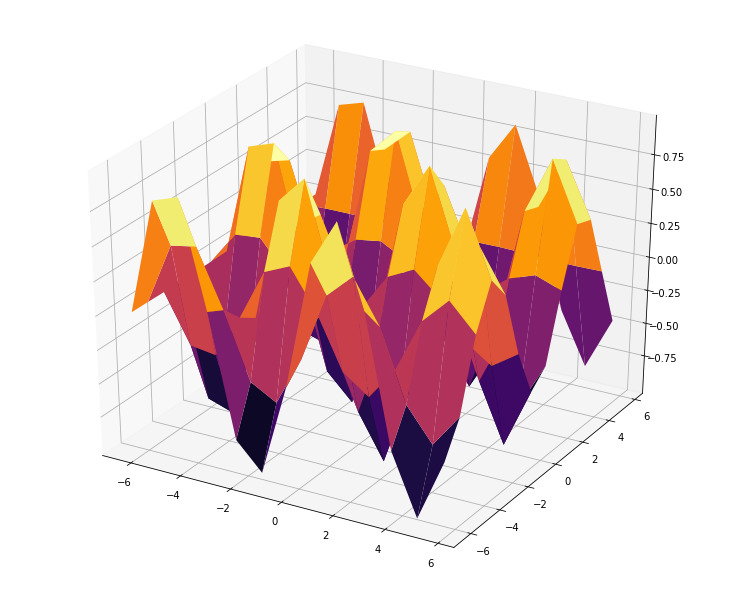

In [20]:
grid_x, grid_y = np.mgrid[-6.28:6.28,-6.28:6.28]

draw_f(grid_x, grid_y)

### Задача 5*

Вам дана картинка. При загрузке её размерность равна 3: **(w, h, num_channels)**, где **w** - ширина картинки в пикселях, **h** - высота картинки в пикселях, **num_channels** - количество каналов *(R, G, B, alpha)*.

Вам нужно "развернуть" картинку в одномерный массив размера w \* h \* num_channels, написав **одну строку кода**.

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline

Загрузим картинку. Если эта ячейка не сработает, смотрите дальше:

In [31]:
path_to_image = './image.jpg'
image_array = plt.imread(path_to_image)

Если Вы работаете в google colab или по каким-то еще причинам картинка с диска не загрузилась, можно попробовать загрузить через ссылку в интернете:

В любом случае, у Вас должен появиться объект `image_array`.  
Распечатаем его на экране:

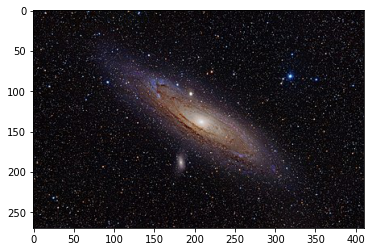

In [32]:
plt.imshow(image_array);

In [37]:
# Ваш код здесь
ir=image_array.flatten()
print(ir)

[ 7  2  9 ...  9  7 12]


In [36]:
# Здесь выведите размерность нового массива
print(np.ndim(ir))

1


## Задание 1

Создайте массив массив из 100 элементов (от 1 до 100), переформатируйте в формат (10 * 10), сделайте слайсинг с шагом 2 по каждой оси.

In [38]:
import numpy as np


In [39]:
s=np.arange(1,101)


In [40]:
sr=s.reshape(10,10)

In [41]:
sr

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
       [ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30],
       [ 31,  32,  33,  34,  35,  36,  37,  38,  39,  40],
       [ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50],
       [ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
       [ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70],
       [ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80],
       [ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90],
       [ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100]])

In [42]:
sr[::2,::2]

array([[ 1,  3,  5,  7,  9],
       [21, 23, 25, 27, 29],
       [41, 43, 45, 47, 49],
       [61, 63, 65, 67, 69],
       [81, 83, 85, 87, 89]])

## Задание 2

Написать функцию, которая по заданной длине последовательности находит среднее арифметическое ее членов.

Реализуйте задачу с и без помощи numpy, сравните время выполнения

In [51]:
import numpy as np
dlina_posl=100000

In [52]:
%%time
sum([x for x in range(1,dlina_posl+1)])/dlina_posl

CPU times: user 7.6 ms, sys: 4.15 ms, total: 11.8 ms
Wall time: 16.1 ms


50000.5

In [53]:
%%time
np.arange(1,dlina_posl+1).mean()

CPU times: user 1.68 ms, sys: 0 ns, total: 1.68 ms
Wall time: 1.73 ms


50000.5

## Задание 3

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5

In [64]:
# задано изначально
import numpy as np
import pandas as pd
r = np.random.RandomState(1)
s=pd.Series(r.uniform(0, 10, 100))



In [68]:
print("Index of the first element of s that is greater than 5 is ",s[s>5].index[0])



Index of the first element of s that is greater than 5 is  1


## Задание 4

Предположим, что мы наблюдаем за некоторым признаком нашего датасета, но в данных есть пропуски. Ваша задача: реализовать алгоритм заполнения пропущенных значений последним известным с помощью средств python и pandas. (подсказка: вам может помочь функция np.isnan(), которая возвращает True, если число - nan. Для реализации с пандас стоит посмотреть на метод .fillna).

Изначальный код с инициализацией такого датасета предоставлен.

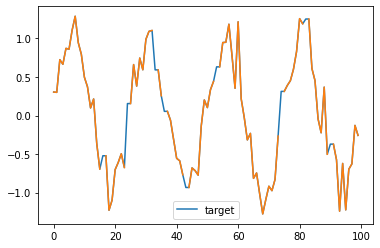

In [70]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None
# создадим датафрейм
df = pd.DataFrame({'target':a})

df.fillna(method='backfill').plot()

# отобразим
plt.plot(df.target.values)

## Задание 5

Имеется небольшой игрушечный датафрейм, в котором необходимо провести несколько типов фильтраций (ответы ищите в решениях) и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [77]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])


df[df['возраст']>40]


,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


In [78]:
df[df['доход']>df['доход'].mean()]

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


In [79]:
df[(df['надежность клиента (0..1)']<df['надежность клиента (0..1)'].mean())&(df['доход']>df['доход'].mean())]

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж


In [82]:
df['важность']=df['доход']*df['надежность клиента (0..1)']
df['долгосрочность']=df['важность']*(df['возраст'].mean()-df['возраст'])

In [83]:
df

,имя,возраст,доход,надежность клиента (0..1),пол,важность,долгосрочность
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0


## Задание 6

Посмотрите на блок Exploratory data analysis, используйте данные, кототрые вы загрузили в ходе его освоения. Ваша задача - вывести имена всех выживших детей и их количество

In [86]:
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

In [89]:
surv_child=data[(data['Age']<=18)&(data['Survived']==1)]['Name']

In [91]:
surv_child.count()

78